
### **Name:** Jungwoo Ahn (안정우)  
### **Student ID:** 2021147584   
### **Department:** Computer Science & Mathematics

# Bollinger Band Strategy on NASDAQ-100 Futures (NQ=F)
저는 한때 해외 선물 거래에 관심을 가졌었고, 특히 NASDAQ-100(NAS100), 금(XAUUSD), 원유(USOUSD), 비트코인(BTCUSD)과 같은 상품들을 주로 거래해 보았습니다. 다양한 전략을 시도해본 결과, 그중에서 Bollinger Band 전략이 가장 직관적이고 제 성향에 가장 잘 맞는다고 느꼈습니다. 추세와 변동성을 함께 시각화해주기 때문에 매수·매도 시점을 명확하게 파악하는 데 도움이 되었고, 시장이 다양한 변동성 구간에서 어떻게 움직이는지를 이해하는 데 도움을 주었기 때문입니다. 프로젝트를 하며 그 당시의 관심을 다시 한번 데이터 기반, 프로그래밍적 관점에서 돌아보고, 실제 NAS100 선물 데이터를 통해 이 전략이 얼마나 효과적인지 백테스팅 해보았습니다. 

Yahoo Finance에서 제공하는 NASDAQ-100(USD 선물) 데이터를 활용하여 Bollinger Band 기반의 간단한 정량적 트레이딩 전략을 구현했습니다.

코드 구성:
- Bollinger Bands, MACD, RSI 지표의 개념
- 해당 지표들을 활용한 매매 신호 생성 방법
- 기본적인 백테스트 시뮬레이션
- 전략의 수익성과 신호에 대한 시각화


I chose this project because I was once very interested in futures trading—especially products like NASDAQ-100 (NAS100), gold (XAUUSD), crude oil (USOUSD), and Bitcoin (BTCUSD). Among the many strategies I explored, the Bollinger Band strategy felt the most intuitive and best suited to my trading style. I liked how it visualized both trend and volatility, giving clear signals for potential buy and sell opportunities. It helped me understand how markets behave under different levels of volatility, and how price often reverts toward the mean. This project is a way to revisit that interest from a data-driven, programmatic perspective, and backtest how well this strategy might perform on actual NAS100 futures data.

This notebook demonstrates a simple quantitative trading strategy using Bollinger Bands applied to NASDAQ-100 (USD futures) using Yahoo Finance data.

The code will cover:
- What Bollinger Bands, MACD, and RSI are
- How to generate trading signals using these indicators
- A basic backtest simulation
- Visualization of performance and signals


In [ ]:
# Install required packages (uncomment if not already installed)
!pip install pandas yfinance matplotlib

## 1. Import required libraries
We import `pandas` for data handling, `yfinance` for fetching financial data, and `matplotlib` for plotting.


In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

## 2. Fetch NASDAQ-100 Futures Data
We use the ticker `"NQ=F"` which corresponds to the NASDAQ-100 E-mini futures on Yahoo Finance.


In [2]:
symbol = "NQ=F"
fut = yf.Ticker(symbol)
data = fut.history(period="1d", start="2020-01-01", end="2023-12-31")
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00-05:00,8776.75,8901.50,8769.50,8891.75,416637,0.0,0.0
2020-01-03 00:00:00-05:00,8895.50,8907.25,8735.25,8810.00,599887,0.0,0.0
2020-01-06 00:00:00-05:00,8772.25,8873.00,8723.00,8847.50,469514,0.0,0.0
2020-01-07 00:00:00-05:00,8853.25,8894.75,8825.75,8853.00,510004,0.0,0.0
2020-01-08 00:00:00-05:00,8841.50,8972.25,8678.00,8944.50,723085,0.0,0.0


## 3. Bollinger Bands

Bollinger Bands were developed by John Bollinger in the 1980s. They’re one of the most popular technical analysis tools for visualizing price volatility.

Each band is built around a 20-day simple moving average:
- The **middle band** is the 20-day SMA.
- The **upper band** is the SMA + 2 standard deviations.
- The **lower band** is the SMA – 2 standard deviations.

So when price moves closer to the upper band, it’s considered overbought. If it drops near the lower band, it might be oversold. It doesn’t guarantee a reversal, but shows how far price is from its average.

Some key ideas:
- Bands expand when volatility rises.
- Bands contract (called a "squeeze") during low volatility — often before a breakout.
- Price riding the upper/lower band might indicate strong momentum, not just reversal.

Bollinger Bands don’t predict direction; they just show how “stretched” the market is. That’s why they’re usually used with other indicators like MACD, RSI, etc. to build more reliable signals.

In [3]:
data["MA20"] = data["Close"].rolling(20).mean()
data["STD20"] = data["Close"].rolling(20).std()
data["UpperBB"] = data["MA20"] + 2 * data["STD20"]
data["LowerBB"] = data["MA20"] - 2 * data["STD20"]

## 4. Add Simple Moving Averages (SMA)
Commonly used SMAs include 10, 50, and 200-day windows.


In [4]:
data["SMA10"] = data["Close"].rolling(10).mean()
data["SMA50"] = data["Close"].rolling(50).mean()
data["SMA200"] = data["Close"].rolling(200).mean()

## 5. Compute MACD (Moving Average Convergence Divergence)
MACD shows momentum and trend-following characteristics.
- MACD line = EMA(12) - EMA(26)
- Signal line = EMA of MACD
- Histogram = MACD - Signal


In [5]:
ema12 = data["Close"].ewm(span=12, adjust=False).mean()
ema26 = data["Close"].ewm(span=26, adjust=False).mean()
data["MACD"] = ema12 - ema26
data["MACD_Signal"] = data["MACD"].ewm(span=9, adjust=False).mean()
data["MACD_Hist"] = data["MACD"] - data["MACD_Signal"]

## 6. Compute RSI (Relative Strength Index)
RSI indicates overbought (>70) or oversold (<30) conditions.


In [6]:
delta = data["Close"].diff()
up = delta.clip(lower=0)
down = -delta.clip(upper=0)
ema_up = up.ewm(com=13, adjust=False).mean()
ema_down = down.ewm(com=13, adjust=False).mean()
rs = ema_up / ema_down
data["RSI"] = 100 - (100 / (1 + rs))

## 7. Generate Trading Signals
We define:
- Buy signal: when price < Lower Bollinger Band
- Sell signal: when price > Upper Bollinger Band


In [7]:
data["Long"]  = (data["Close"] < data["LowerBB"]).astype(int)
data["Short"] = (data["Close"] > data["UpperBB"]).astype(int)

## 8. Backtest Strategy
Simulate trades based on the signals:
- Buy 100 shares when "Long"
- Sell (go flat) when "Short"
Track portfolio value over time.


In [8]:
initial_capital = 10_000
positions = pd.DataFrame(index=data.index).fillna(0)
positions["Shares"] = 100 * data["Long"] - 100 * data["Short"]
positions["Shares"] = positions["Shares"].clip(lower=0)

portfolio = positions.multiply(data["Close"], axis=0).rename(columns={"Shares": "PositionValue"})
pos_diff = positions.diff().fillna(0)
cash = initial_capital - (pos_diff.multiply(data["Close"], axis=0)).cumsum()
portfolio["Cash"] = cash
portfolio["Total"] = portfolio["PositionValue"] + portfolio["Cash"]
portfolio["Return"] = portfolio["Total"].pct_change()

## 9. Plot Price and Bollinger Bands with Buy/Sell Signals
Visual representation helps confirm if the signals are reasonable.


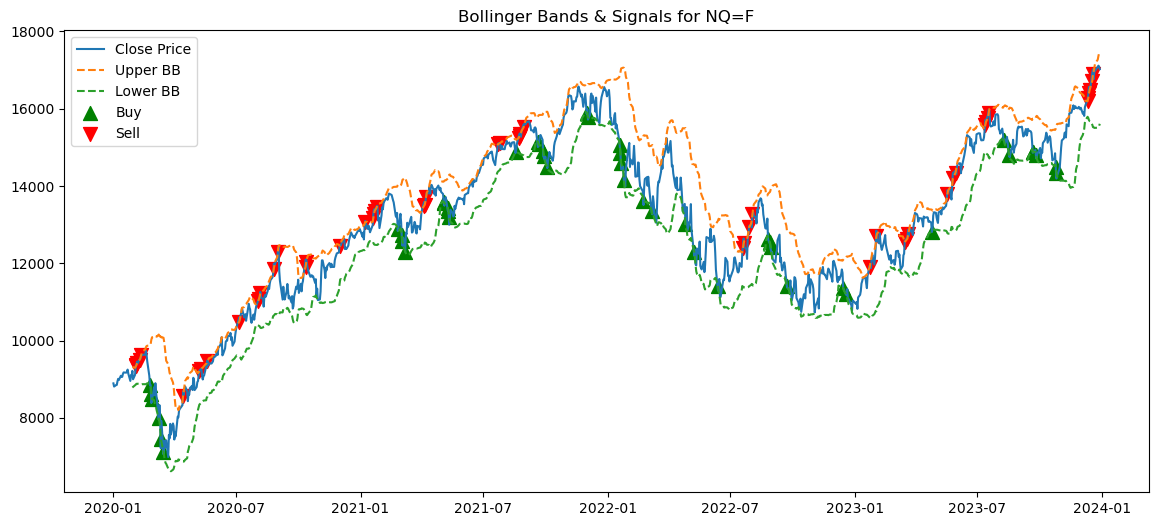

In [9]:
plt.figure(figsize=(14, 6))
plt.plot(data["Close"], label="Close Price")
plt.plot(data["UpperBB"], label="Upper BB", linestyle="--")
plt.plot(data["LowerBB"], label="Lower BB", linestyle="--")
buy_idx  = data.index[data["Long"] == 1]
sell_idx = data.index[data["Short"] == 1]
plt.scatter(buy_idx,  data.loc[buy_idx,  "LowerBB"], marker="^", color="green", label="Buy", s=100)
plt.scatter(sell_idx, data.loc[sell_idx, "UpperBB"], marker="v", color="red",   label="Sell", s=100)
plt.title(f"Bollinger Bands & Signals for {symbol}")
plt.legend()
plt.show()

## 10. Plot Equity Curve
This shows how our portfolio grows over time.


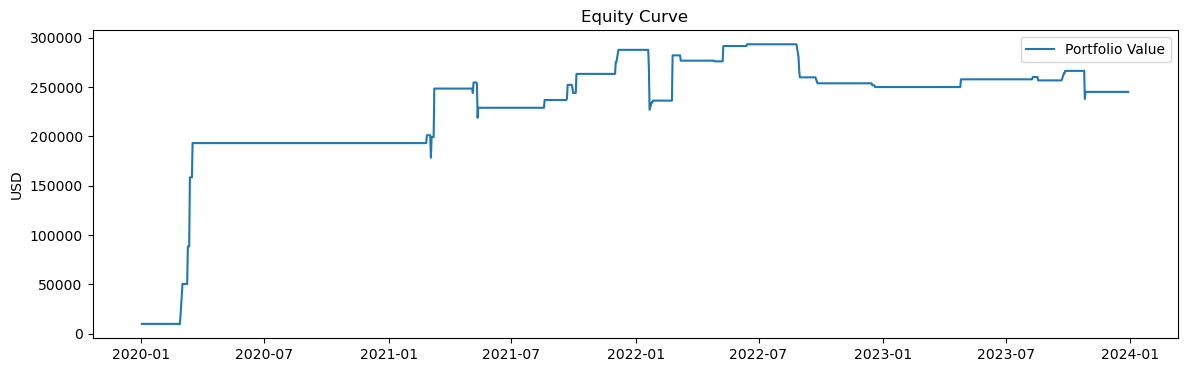

In [10]:
plt.figure(figsize=(14, 4))
plt.plot(portfolio["Total"], label="Portfolio Value")
plt.title("Equity Curve")
plt.ylabel("USD")
plt.legend()
plt.show()

### Conclusion

첫 번째 차트인 Bollinger Band 및 매수/매도 신호 그래프를 보면, 전략이 국지적인 고점과 저점에서 비교적 잘 작동하는 모습을 확인할 수 있었습니다. 가격이 하단 밴드를 터치하거나 돌파한 직후 반등하는 구간에서 매수 신호가 발생하고, 상단 밴드를 돌파한 직후에는 매도 신호가 생성되어 단기 하락과 맞물리는 경우도 많았습니다. 하지만 추세장이 강하게 형성된 2021년과 2023년에는 상승 추세 중 매도 신호, 하락 추세 중 매수 신호가 잦게 발생해 오히려 손실로 이어질 가능성도 보였습니다. 이처럼 Bollinger Band는 **횡보장에서는 효과적**일 수 있으나, **추세장에서는 역추세 진입이 되어버리는 단점**도 함께 드러납니다.

두 번째 그래프인 수익곡선 (Equity, 잔고) 을 보면, 2020년~2021년 초반까지는 전략이 강한 상승 수익을 보였지만, 이후에는 수익이 정체되거나 오히려 일부 구간에서 손실이 나타나는 모습을 확인할 수 있습니다. 이는 전략이 특정 구간에 과적합되어 있었을 가능성 또는 리스크 관리(예: 손절 매커니즘, 포지션 크기 조절)의 부재를 시사합니다.

실시간 시장에 이 전략을 적용하려면 몇 가지 보완이 필요할 것 같습니다. 일단 단순한 진입/청산 신호만으로는 노이즈가 많기 때문에, **손절 조건**이나 **추세 확인 지표(MACD, RSI 등)** 와의 조합이 도움이 될 수 있습니다. **아주 적은 경험이지만 과거에 '기술적 분석의 종류/전략 보다는 감정에 휘둘리지 않는 손절/익절 기준의 설정과 이행이 훨씬 중요하구나' 라는 경험을 얻은 기억이 있습니다.** 또한 실제 시장에서는 부정확한 Bollinger Band, 체결 지연, 슬리피지(slippage) 등으로 인해 백테스트 결과만큼 수익을 낼 수 있을지는 확인해 보아야 알 것 같습니다. 이번 프로젝트를 통해 과거에 흥미를 가졌던 볼린저 밴드 보조지표를 이용한 해외 선물 트레이딩 전략을 정량적으로 검증해 볼 수 있었어서 유익했던 시간이었던 것 같습니다.
   

Translation in English:

Looking at the first chart, which shows Bollinger Bands with buy/sell signals, the strategy appears to generate frequent trade entries that align reasonably well with local tops and bottoms. There are clear points where the price touches or crosses the lower band, triggering buy signals just before price rebounds, and similarly, sell signals near the upper band often precede a short-term decline. However, it's also visible that during strong trends—especially in 2021 and 2023—the strategy issues false counter-trend signals. This reflects one of the known weaknesses of Bollinger Bands: they tend to work better in **range-bound** markets than in **trending** ones.

The equity curve shows an aggressive growth phase early on, especially during the 2020–2021 period, but later becomes relatively flat with sudden drops, suggesting the strategy's performance became inconsistent. It might indicate overfitting to specific volatility patterns or the lack of a dynamic position-sizing method.

I think this strategy might work in live trading, but with several caveats. It would require better risk management, such as stop-loss logic and confirmation from other momentum indicators. Also, because live markets are noisy and fast-moving, execution delay and slippage can affect profitability. The backtest gave me insight into the strengths of this strategy in calm conditions, but in reality, combining Bollinger Bands with macro filters or news sentiment could enhance reliability. Overall, this was a valuable exercise in turning a manual strategy I once used into code—and seeing it work (and fail) visually taught me more than just reading about it ever could.